In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

## Problem 4: Classification with Scikit-Learn.

a.<br>
I stored the input values in 2 arrays ($x_1, x_2$) and the binary output values in an array (y), then plotted the data in 3 dimensions to visualize the planes y = 1 and y = -1. <br> 

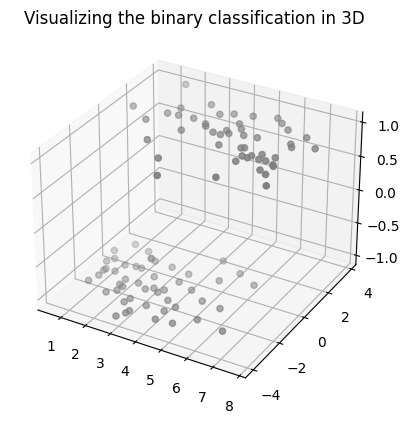

In [4]:
with open('p2_x.txt', 'r') as file:
    data1 = file.readlines()
x1 = []
x2 = []
for line in data1:
    values = line.strip().split()
    x1.append(float(values[0]))
    x2.append(float(values[1]))


with open('p2_y.txt', 'r') as file:
    data2 = file.readlines()
y = []
for i in range(len(data2)):
    y.append(float(data2[i]))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.scatter(x1, x2, y, color = 'gray')
plt.title("Visualizing the binary classification in 3D")
plt.show()

In order to shuffle the data in the arrays in the same way, I created a "shuffled_indices" array that would generate a random permutation of the indices, then updated my arrays accordingly.<br>
We could now split this shuffled data into training and testing sets using the sklearn function train_test_split where I chose the testing set to be 10% of the data.

In [5]:
shuffled_indices = np.random.permutation(len(y))

x1 = [x1[i] for i in shuffled_indices]
x2 = [x2[i] for i in shuffled_indices]
y = [y[i] for i in shuffled_indices]

x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x1,x2,y, shuffle = False, test_size = 0.1)

b. <br>
To project the y data onto the ($x_1, x_2$) plane while still being able to visualize the 2 classes, I found the indices of the training and tetsing sets of ($x_1, x_2$) corresponding to the training and testing values of y being 1 and -1, then scattered them giving each point a corresponding symbol and color according to its index.

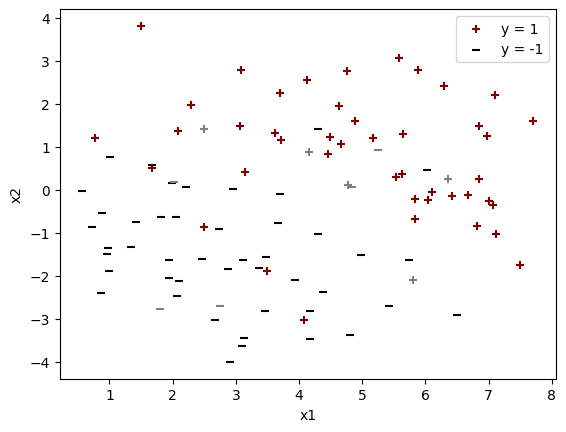

In [6]:
min_index = []
plus_index = []

for i in range(len(y_train)):
    if y_train[i] == 1.0:
        plus_index.append(i)
    else:
        min_index.append(i)

plus_index_t = []
min_index_t = []
for i in range(len(y_test)):
    if y_test[i] == 1.0:
        plus_index_t.append(i)
    else:
        min_index_t.append(i)

plt.scatter([x1_train[i] for i in plus_index],[x2_train[i] for i in plus_index], color = 'maroon', label = "y = 1", marker= "+")
plt.scatter([x1_train[i] for i in min_index],[x2_train[i] for i in min_index], color = 'k', label = "y = -1", marker = "_")
plt.scatter([x1_test[i] for i in plus_index_t],[x2_test[i] for i in plus_index_t], color = 'gray', marker = "+")
plt.scatter([x1_test[i] for i in min_index_t],[x2_test[i] for i in min_index_t], color = 'gray', marker = "_")

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

c. <br>
Storing the 2 input arrays $(x_1, x_2)$ in an input matrix where each variable is a column, we get 2 matrices corresponding to the training and testing input data. Applying the  LogisticRegression().fit() function on the input matrix and output array, I could recover the optimal coefficients vector $w$ and the bias value $b$ that fits the prediction function $$w[0]x_1 + w[1]x2 + b$$ This prediction function being the argument of our model, the sigmoid function $$f_w(x) = \frac{1}{1+e^{-(Xw + b)}}$$

In [9]:
input_train = np.array([x1_train, x2_train]).T
input_test = np.array([x1_test, x2_test]).T


regl2 = LogisticRegression(penalty="l2")
fit = regl2.fit(input_train, np.array(y_train).T)

coef = regl2.coef_[0]
bias = regl2.intercept_

f = 1/(1 + np.exp(-1*input_train@coef.T - np.ones(len(input_train))*bias)) # the model

SGD attempt. to revisist later.

In [10]:
# def sigmoid(z):
#   return 1/(1 + np.exp(-z))

# def SGD_Binary(x1_train, x2_train, y_train, eta, epochs, sigmoid):
#   indices = np.arange(len(x1_train))
#   w0, w1, w2 = 0,0,0
#   for i in range(epochs):
#     for j in indices:
#       z = w0 + w1 * x1_train[j] + w2 * x2_train[j]
#       w0 = w0 + eta * (y_train[j] - sigmoid(z))
#       w1 = w1 + eta * (y_train[j] - sigmoid(z)) * x1_train[j]
#       w2 = w2 + eta * (y_train[j] - sigmoid(z)) * x2_train[j]
#     np.random.shuffle(indices)
#   return w0, w1, w2

# w0, w1, w2 = SGD_Binary(x1_train, x2_train, y_train, 0.01, 500, sigmoid)

# z = w0 + w1 * np.array(x1_train) + w2 * np.array(x2_train)

# fSGD = sigmoid(z)
# print(w0, w1, w2)


d. <br>
The sigmoid function is a smoothly increasing function from 0 to 1. If, for given inputs, the value of the model is less than or equal to 0.5, this implies that the output value is more likely to be found in the y = -1 class. And if the value of the model was greater than 0.5, the output value would be more likely to be found in the y = 1 class. We use this criterion to identify the decision boundary that separates these two classes. <br>
We should note that the prediction function $$ z = w[0] x_1 + w[1] x_2 + b$$ is a hyperplane in the ($x_1. x_2, y$) space. Setting the sigmoid function to = 0.5, $\sigma(z) = 0.5$ is solved by $z = 0$ (this is very clear analytically, it it was not, I would have used a root finder algorithm) and would give us a plane in the ($x_1. x_2, y$) space separating the 2 classes. The projection of this plane would give us the decision boundary in the ($x_1, x_2$) plane.<br>
I will define a function that takes the $x_1$ training input data and the coefficients given by the regression method, and returns the corresponding $x_2$ values that lie on the decision boundary by satisfying  $$x_2 = - \frac{w[0]x_1 + b}{w[1]}$$

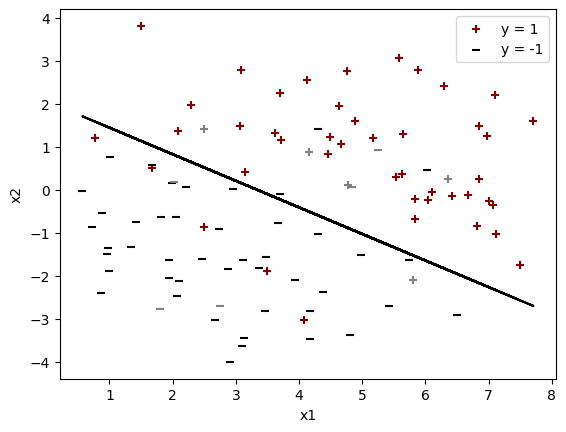

In [10]:
plt.scatter([x1_train[i] for i in plus_index],[x2_train[i] for i in plus_index], color = 'maroon', label = "y = 1", marker= "+")
plt.scatter([x1_train[i] for i in min_index],[x2_train[i] for i in min_index], color = 'k', label = "y = -1", marker = "_")
plt.scatter([x1_test[i] for i in plus_index_t],[x2_test[i] for i in plus_index_t], color = 'gray', marker = "+")
plt.scatter([x1_test[i] for i in min_index_t],[x2_test[i] for i in min_index_t], color = 'gray', marker = "_")
plt.xlabel("x1")
plt.ylabel("x2")


def DecisionBoundary(x1_train, coef, bias):
    return -(coef[0]*np.array(x1_train) + bias)/coef[1]

plt.plot(x1_train, DecisionBoundary(x1_train, coef, bias), color = 'k')
plt.legend()
plt.show()

e. <br>
The goal of the regression process is to find the coefficients vector that minimizes the error function. In the previous parts, I used the default penalty in the LogisticrRegression() function which is the Ridge (L2) regeression method which penalizes large coefficients, by minimizing the sum of the coefficients squared, but does not force them to become exactly zero.<br>

I will now use the Lasso (L1) and the ElasticNet regression methods and compare their scores and decision boundaries to that of L2. Noting that the L1 regression model tends to force some coefficients to zero by minimizing the absolute value of the sum of the coefficients. And the ElasticNet method  combines both L1 and L2 penalties.

coef vector with l2:  [-2.15127986] [0.68705499 1.06701792]
coef vector with L1:  [-1.56612677] [0.55779648 1.06324392]
coef vector with elasticnet:  [-2.11664464] [0.67837145 1.06739817]


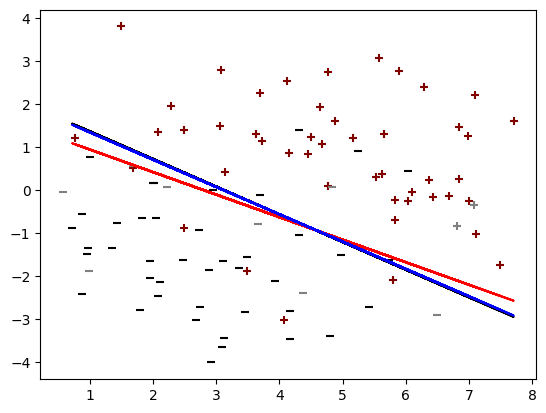

l2 training score: 0.8764044943820225 , l2 testing score: 0.9
l1 training score: 0.8876404494382022 , l1 testing score: 0.9
elasticnet training score: 0.8764044943820225 , elasticnet testing score: 0.9


In [7]:
print("coef vector with l2: ", bias, coef)


regl1 = LogisticRegression(penalty="l1", solver = 'liblinear')
fit1 = regl1.fit(input_train, y_train)
coef1 = regl1.coef_[0]
bias1 = regl1.intercept_
print("coef vector with L1: ", bias1, coef1)



regle = LogisticRegression(penalty="elasticnet", solver = 'saga', l1_ratio=0.6)
fite = regle.fit(input_train, y_train)
coefe = regle.coef_[0]
biase = regle.intercept_
print("coef vector with elasticnet: ", biase, coefe)



plt.scatter([x1_train[i] for i in plus_index],[x2_train[i] for i in plus_index], color = 'maroon', label = "y = 1", marker= "+")
plt.scatter([x1_train[i] for i in min_index],[x2_train[i] for i in min_index], color = 'k', label = "y = -1", marker = "_")
plt.scatter([x1_test[i] for i in plus_index_t],[x2_test[i] for i in plus_index_t], color = 'gray', marker = "+")
plt.scatter([x1_test[i] for i in min_index_t],[x2_test[i] for i in min_index_t], color = 'gray', marker = "_")


plt.plot(x1_train, DecisionBoundary(x1_train, coef, bias), color = 'k')
plt.plot(x1_train, DecisionBoundary(x1_train, coef1, bias1), color = 'r')
plt.plot(x1_train, DecisionBoundary(x1_train, coefe, biase), color = 'b')

plt.show()

print("l2 training score:", regl2.score(input_train, y_train), ", l2 testing score:",regl2.score(input_test, y_test))
print("l1 training score:", regl1.score(input_train, y_train), ", l1 testing score:", regl1.score(input_test, y_test))
print("elasticnet training score:", regle.score(input_train, y_train), ", elasticnet testing score:", regle.score(input_test, y_test))


We notice how L2 and ElasticNet penalties methods return almost the same decision boundaries, while the L1 method return a decision boundary that deviates from that of L2. This can also be noticed by the values coefficients vectors of the methods, where the values of the ElasticNet coefficients vector are closer to that L2 than the L1 method.<br> These differences, however, do not manifest themselves in the scores, as we notice that the testing and training scores of the 3 methods are so close to each other.

f. <br>
Fitting problems using support vector machines involve finding the optimal hyperplane in the ($x_1, x_2, y$) space that best separates thr 2 classes in the feature space. I will use the SVC implemetation with a linear kernel to fit our data then compare the accuracies of all the fitting methods I have used so far.

In [8]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(input_train, y_train)

coefsvm = svm_model.coef_[0]
biassvm = svm_model.intercept_

svm_prediction = svm_model.predict(input_test)
logisticl2_prediction = regl2.predict(input_test)
logisticl1_prediction = regl1.predict(input_test)
logisticel_prediction = regle.predict(input_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_prediction))
print("Logistic Regression L2 Accuracy:", accuracy_score(y_test, logisticl2_prediction))
print("Logistic Regression L1 Accuracy:", accuracy_score(y_test, logisticl1_prediction))
print("Logistic ElasticNet Regression Accuracy:", accuracy_score(y_test, logisticel_prediction))

SVM Accuracy: 0.9
Logistic Regression L2 Accuracy: 0.9
Logistic Regression L1 Accuracy: 0.9
Logistic ElasticNet Regression Accuracy: 0.9


All the methods gave me the same accuracy which is an indication that the complexity of the different models is not high enough to observe differences in the implementations of the different methods. 